In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import os
#os.listdir('drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction')
folderdir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/'
traindir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/train.csv'
submissiondir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/sample_submission.csv'
testfolderdir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/test'
train_X_npdir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/train_X.npy'
train_Y_npdir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/train_Y.npy'
train_X_mapdir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/train_X.memmap'
train_Y_mapdir = 'drive/My Drive/MATH 189/Final Project/LANL-Earthquake-Prediction/train_Y.memmap'
train_X_csv = 'drive/Shared Wwith ME/MATH 189/Final Project/LANL-Earthquake-Prediction/train_X.csv'
train_size = 629145480

In [0]:
# for reference, not important
'''
with open(traindir, 'r', newline='') as f:
  csv_reader = csv.reader(f, delimiter=',')
  for i in range(10):
    print(next(csv_reader))
'''

['acoustic_data', 'time_to_failure']
['12', '1.4690999832']
['6', '1.4690999821']
['8', '1.469099981']
['5', '1.4690999799']
['8', '1.4690999788']
['8', '1.4690999777']
['9', '1.4690999766']
['7', '1.4690999755']
['-5', '1.4690999744']


In [0]:
# for reference, not important
'''
with open(traindir, 'r', newline='') as f:
  csv_reader = csv.reader(f, delimiter=',')
  numline = 0
  for row in csv_reader:
    numline += 1

print(numline)
'''

629145481


In [0]:
# load and save train data initially, not important any more
'''
# load
import csv
fieldnames = ['acoustic_data', 'time_to_failure']
numline = 629145480 # number of lines in train data NOT including header
train_X = np.empty(numline,dtype=np.int16)
train_Y = np.empty(numline, dtype=np.float64)
with open(traindir, 'r', newline='') as f:
  csv_reader = csv.reader(f, delimiter=',')
  index = 0
  next(csv_reader) # skip header
  for row in csv_reader:
    train_X[index] = int(row[0])
    train_Y[index] = float(row[1])
    index += 1

# save
with open(train_X_npdir, 'wb') as f:
  np.save(f, train_X, allow_pickle=False)
with open(train_Y_npdir, 'wb') as f:
  np.save(f, train_Y, allow_pickle=False)
'''

In [0]:
# create memmap for train_X and train_Y
'''
memmap_X = np.memmap(train_X_mapdir, dtype=np.int16, mode='w+', shape=(train_size,))
memmap_X[:] = train_X[:]
memmap_Y = np.memmap(train_Y_mapdir, dtype=np.float64, mode='w+', shape=(train_size,))
memmap_Y[:] = train_Y[:]
del memmap_X
del memmap_Y
'''

In [0]:
# load data from npy files
'''
with open(train_X_npdir, 'rb') as f:
  train_X = np.load(f)
with open(train_Y_npdir, 'rb') as f:
  train_Y = np.load(f)
'''

In [0]:
# create X and Y data file for R
'''
f = open(train_X_csv,'w+')
f.close()
with open(train_X_csv, 'a') as f:
  for value in train_X:
    f.write(str(value)+' ')
'''

In [0]:
# load data from memmap
train_X = np.memmap(train_X_mapdir, dtype=np.int16, mode='r', shape=(train_size,))
train_Y = np.memmap(train_Y_mapdir, dtype=np.float64, mode='r', shape=(train_size,))

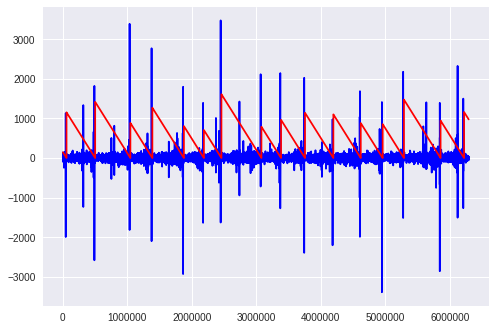

In [0]:
# acoustic data and time remaining
plt.plot(train_X[::100], color='b')
plt.plot(train_Y[::100]*100, color='r')

In [0]:
# acoustic norm of leading n data points v. time remaining


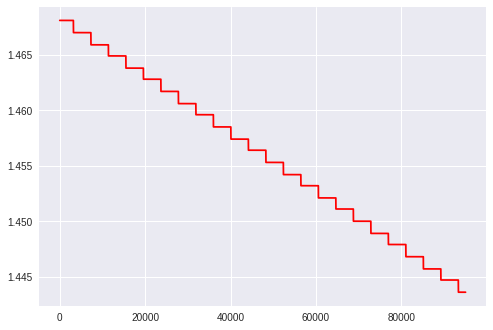

In [0]:
#plt.figure(figsize=(16,8))
#plt.plot(train_X[:50000])
plt.plot(train_Y[5000:100000], color='r')

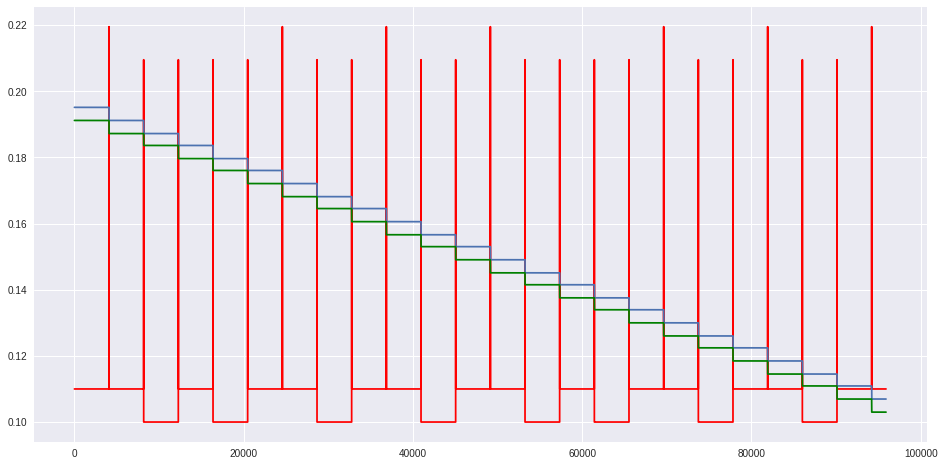

In [0]:
# time to remain stationary until next jump
plt.figure(figsize=(16,8))
plt.plot((train_Y[4100:100000] - train_Y[8200:104100])*100, 'r-')
plt.plot(3.6*(train_Y[4100:100000])-5.09)
plt.plot(3.6*(train_Y[8200:104100])-5.09, 'g')
# conclusion: stationary time snippet ranges about 4100 data (+-50)

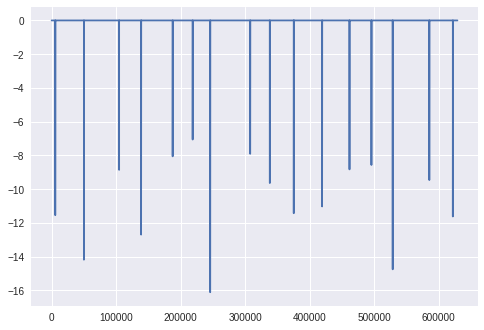

In [21]:
# 4100 continuous data segments throughout entire dataset
plt.plot(train_Y[4100:-4100:1000]-train_Y[8200::1000])

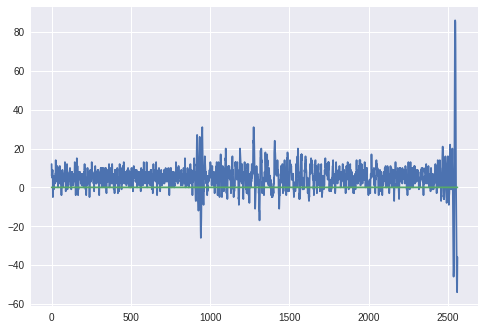

In [10]:
plt.plot(train_X[:2560])
plt.plot(train_Y[:2560])

mean: 5.15859375
sigma: 7.30425846834988


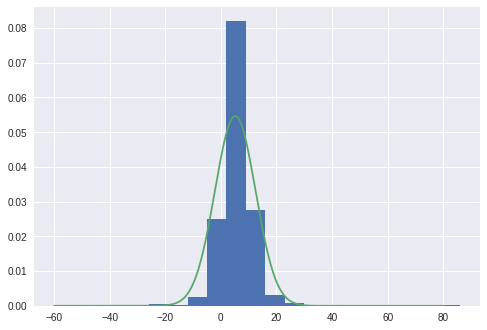

NormaltestResult(statistic=1052.0953028246631, pvalue=3.470625660429211e-229)
NormaltestResult(statistic=453.75182463690123, pvalue=2.944714557506046e-99)
KstestResult(statistic=0.13775549403200693, pvalue=0.0)


In [41]:
# acoustic data in of first 2650 (before second earthquake countdown) is normal
# with mean(5.1585) and sigma(std: 7.30426)
n, bins, patches = plt.hist(train_X[:2560], bins=20, density=True)
mean = np.mean(train_X[:2560])
stdev = np.std(train_X[:2560])
print('mean: '+str(mean)+'\nsigma: '+str(stdev))
xrange = np.linspace(-60,80,1000)
plt.plot(xrange, stats.norm.pdf(xrange, mean, stdev))
plt.show()
print(stats.normaltest(train_X[:2560])) # reject, pval~e-229
print(stats.normaltest(train_X[:2560][abs(train_X[:2560])<40])) # reject, pval~e-99
print(stats.kstest(train_X[:2560], 'norm', args=[mean, stdev])) # reject, pval=0

mean: 5.219024390243902
sigma: 5.814223856043522


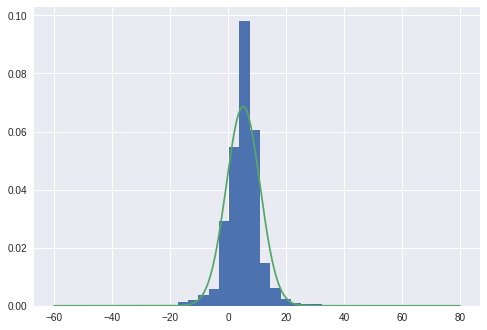

NormaltestResult(statistic=424.94100000764973, pvalue=5.31170908272625e-93)
NormaltestResult(statistic=397.5816914587933, pvalue=4.63695249731299e-87)
KstestResult(statistic=0.0888992958937147, pvalue=1.4336653390835807e-28)


In [42]:
# acoustic data in of 4100-8200 (before second earthquake countdown) is normal
# with mean(5.21) and sigma(std: 5.81)
a, b = 4100, 8200
n, bins, patches = plt.hist(train_X[a:b], bins=20, density=True)
mean = np.mean(train_X[a:b])
stdev = np.std(train_X[a:b])
print('mean: '+str(mean)+'\nsigma: '+str(stdev))
xrange = np.linspace(-60,80,1000)
plt.plot(xrange, stats.norm.pdf(xrange, mean, stdev))
plt.show()
print(stats.normaltest(train_X[a:b])) # reject, pval~e-93
print(stats.normaltest(train_X[a:b][abs(train_X[a:b])<40])) # reject, pval~e-87
print(stats.kstest(train_X[a:b], 'norm', args=(mean, stdev))) # reject, pval~e-28

mean: 4.645853658536585
sigma: 7.053035663892899


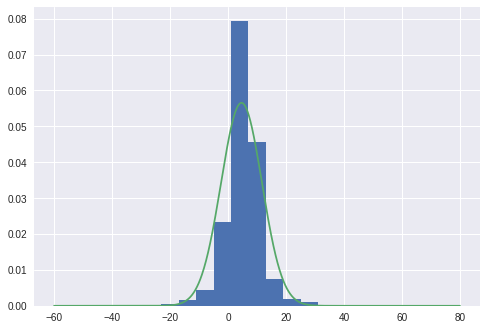

NormaltestResult(statistic=900.6429943735002, pvalue=2.6782967195925387e-196)
NormaltestResult(statistic=679.3878052955845, pvalue=2.9703836374356813e-148)
KstestResult(statistic=0.11963272597161834, pvalue=2.152599348893637e-51)


In [43]:
# acoustic data in of 4100-8200 (before second earthquake countdown) is normal
# with mean(4.64) and sigma(std: 7.053)
a, b = 410000000, 410004100
n, bins, patches = plt.hist(train_X[a:b], bins=20, density=True)
mean = np.mean(train_X[a:b])
stdev = np.std(train_X[a:b])
print('mean: '+str(mean)+'\nsigma: '+str(stdev))
xrange = np.linspace(-60,80,1000)
plt.plot(xrange, stats.norm.pdf(xrange, mean, stdev))
plt.show()
print(stats.normaltest(train_X[a:b])) # reject, pval~e-196
print(stats.normaltest(train_X[a:b][abs(train_X[a:b])<40])) # reject, pval~e-148
print(stats.kstest(train_X[a:b], 'norm', args=[mean, stdev])) # reject, pval~e-51

In [48]:
# 2sample ks test on different time acoustic segments shows
# data are time-variant
print(stats.ks_2samp(train_X[:2650], train_X[4100:8200]))
print(stats.ks_2samp(train_X[4100:8200], train_X[20500:24600]))
print(stats.ks_2samp(train_X[4100:8200], train_X[41000:45100]))
print(stats.ks_2samp(train_X[4100:8200], train_X[61500:65600]))
print(stats.ks_2samp(train_X[4100:8200], train_X[410000:414100]))
print(stats.ks_2samp(train_X[4100:8200], train_X[4100000:4104100]))
print(stats.ks_2samp(train_X[4100:8200], train_X[41000000:41004100]))
print(stats.ks_2samp(train_X[4100:8200], train_X[410000000:410004100]))
print(stats.ks_2samp(train_X[4100:8200], train_X[615000000:615004100]))

Ks_2sampResult(statistic=0.016525540727105395, pvalue=0.7683671072494809)
Ks_2sampResult(statistic=0.12048780487804878, pvalue=2.0483970248803898e-26)
Ks_2sampResult(statistic=0.03170731707317076, pvalue=0.0317097904040017)
Ks_2sampResult(statistic=0.059024390243902436, pvalue=1.1588209692084175e-06)
Ks_2sampResult(statistic=0.06453755131610728, pvalue=3.609755497681633e-15)
Ks_2sampResult(statistic=0.14823201189054858, pvalue=6.790277830468926e-79)
Ks_2sampResult(statistic=0.12975609756097561, pvalue=1.4428692809497286e-30)
Ks_2sampResult(statistic=0.05439024390243907, pvalue=1.0114302718036085e-05)
Ks_2sampResult(statistic=0.0970731707317074, pvalue=2.6986439626235952e-17)


In [47]:
# scale is important, normalizing doesn't help
print(stats.ks_2samp(train_X[:2650]/np.linalg.norm(train_X[:2650]), train_X[4100:8200]/np.linalg.norm(train_X[4100:8200])))
print(stats.ks_2samp(train_X[4100:8200]/np.linalg.norm(train_X[4100:8200]), train_X[41000:45100]/np.linalg.norm(train_X[41000:45100])))
print(stats.ks_2samp(train_X[4100:8200]/np.linalg.norm(train_X[4100:8200]), train_X[410000:824100]/np.linalg.norm(train_X[410000:824100])))
print(stats.ks_2samp(train_X[4100:8200]/np.linalg.norm(train_X[4100:8200]), train_X[4100000:8204100]/np.linalg.norm(train_X[4100000:8204100])))
print(stats.ks_2samp(train_X[4100:8200]/np.linalg.norm(train_X[4100:8200]), train_X[41000000:41004100]/np.linalg.norm(train_X[41000000:41004100])))
print(stats.ks_2samp(train_X[4100:8200]/np.linalg.norm(train_X[4100:8200]), train_X[410000000:410004100]/np.linalg.norm(train_X[410000000:410004100])))
print(stats.ks_2samp(train_X[4100:8200]/np.linalg.norm(train_X[4100:8200]), train_X[615000000:615004100]/np.linalg.norm(train_X[615000000:615004100])))

Ks_2sampResult(statistic=0.20969627243442246, pvalue=2.7926113176858784e-62)
Ks_2sampResult(statistic=0.12219512195121951, pvalue=3.712341004050256e-27)
Ks_2sampResult(statistic=0.7877710697899057, pvalue=0.0)
Ks_2sampResult(statistic=0.8484225530566993, pvalue=0.0)
Ks_2sampResult(statistic=0.17317073170731706, pvalue=4.119368126598947e-54)
Ks_2sampResult(statistic=0.14073170731707318, pvalue=6.988582505789606e-36)
Ks_2sampResult(statistic=0.1582926829268293, pvalue=2.7765148586486646e-45)


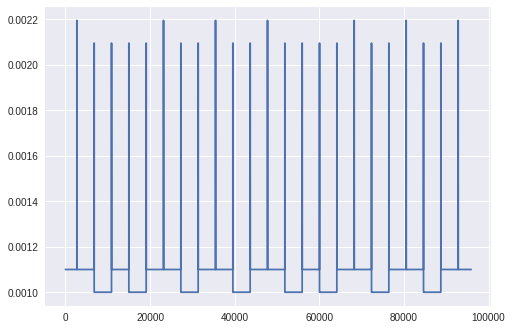

In [0]:
plt.plot(train_Y[500004100:500100000] - train_Y[500008200:500104100])

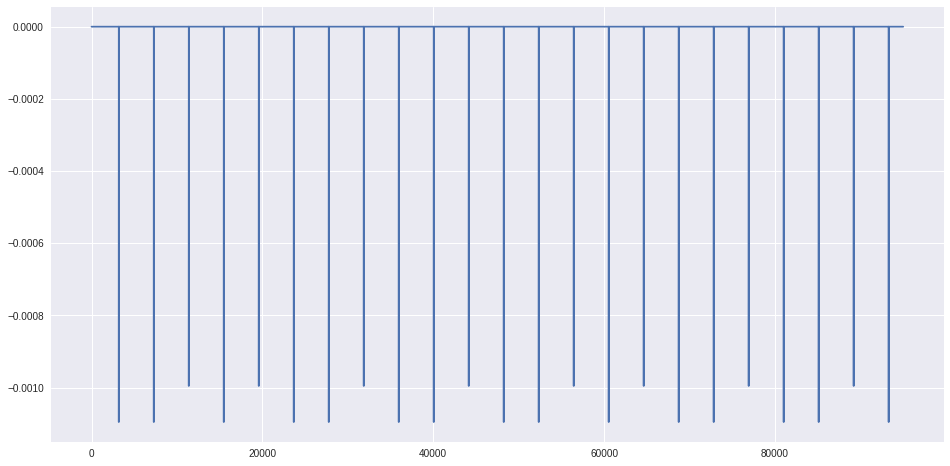

In [0]:
plt.figure(figsize=(16,8))
plt.plot(train_Y[5000:100000]-train_Y[4999:99999])

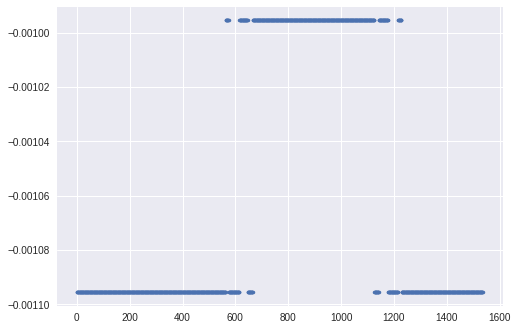

In [0]:
# mini jumps only occur at two values
plt.plot((train_Y[1::100]-train_Y[:-1:100])[abs(train_Y[1::100] - train_Y[:-1:100]) > 0.00005], '.')
#plt.plot(train_X)

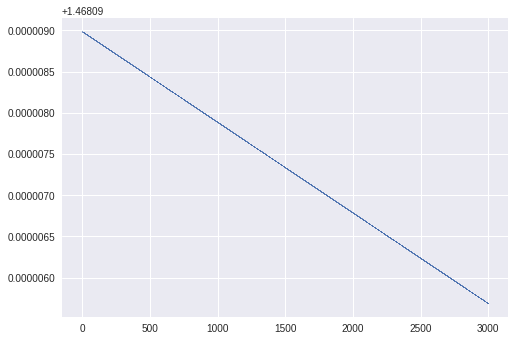

In [0]:
plt.plot(train_Y[5000:8000], '.', markersize='1.5')

(array([  30728.,   65058.,  211396.,  826608., 1935055., 1941657.,
         836179.,  214675.,   66006.,   37781.]),
 array([-10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.]),
 <a list of 10 Patch objects>)

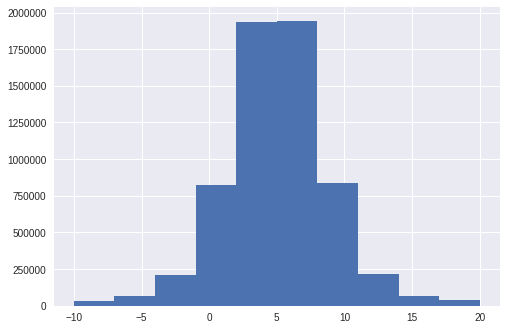

In [0]:
# distribution of acoustic data
plt.hist(train_X[::100], range=(-10,20))

In [11]:
mean = np.mean(train_X[::100])
stdev = np.std(train_X[::100])
stats.kstest(train_X[::100], 'norm', args=[mean, stdev])

KstestResult(statistic=0.24761736399957357, pvalue=0.0)

In [12]:
stats.normaltest(train_X[::100])

NormaltestResult(statistic=10390876.292534076, pvalue=0.0)

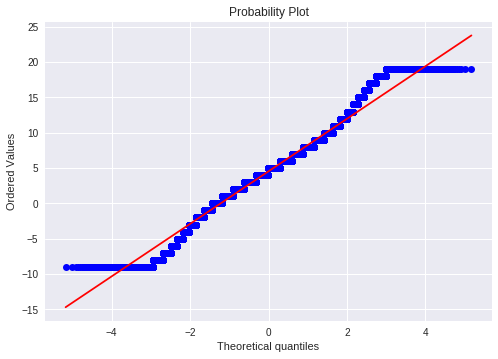

In [0]:
# QQ plot of acoustic data
from scipy import stats
plt.clf()
selcrt1 = train_X[::100]<20
selcrt2 = train_X[::100]>-10
selcrt = np.logical_and(selcrt1, selcrt2)
res = stats.probplot(train_X[::100][selcrt], plot=plt)
plt.show()

(array([2.937000e+03, 5.578000e+03, 1.284900e+04, 3.965600e+04,
        4.756750e+05, 5.199448e+06, 4.831090e+05, 3.965100e+04,
        1.283500e+04, 6.188000e+03]),
 array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 10 Patch objects>)

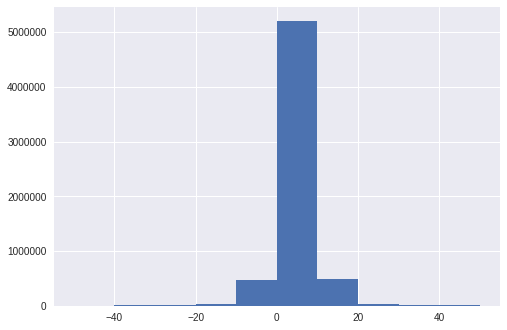

In [0]:
# distribution of acoustic data without extreme values (>500 or <-500)
plt.clf()
selcrt1 = train_X[::100]<20
selcrt2 = train_X[::100]>-10
selcrt = np.logical_and(selcrt1, selcrt2)
plt.hist(train_X[::100][selcrt], range=(-50,50))

In [0]:
# subsetting data to create knn training set with rolling windows
window_size = 4100
test_size = 100 * 4100
skip = 100
train_start = 4100
test_start = train_start + test_size*2
knn_train_X = train_X[ np.arange(window_size).reshape((1,window_size)) 
                      + np.arange(train_start,train_start+test_size,skip).reshape((int(test_size/skip),1)) ]
knn_train_Y = train_Y[ np.arange(train_start+window_size-1, train_start+test_size+window_size-1, skip) ]
knn_test_X = train_X[ np.arange(window_size).reshape((1,window_size)) 
                     + np.arange(test_start,test_start+test_size,skip).reshape((int(test_size/skip),1)) ]
knn_test_Y = train_Y[ np.arange(test_start+window_size-1, test_start+test_size+window_size-1, skip) ]

300: -0.000866055048365455


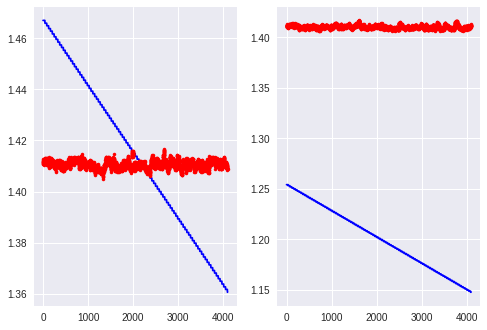

In [5]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# neighbor = 300
knnclf = KNeighborsRegressor(n_neighbors=300, leaf_size=300)
knnclf.fit(knn_train_X, knn_train_Y)
knn_prediction = knnclf.predict(knn_test_X)
print('300: ' + repr(r2_score(knn_train_Y, knn_prediction)))

# plot training
fig, ax = plt.subplots(1,2)
ax[0].plot(knn_train_Y, 'b')
ax[0].plot(knnclf.predict(knn_train_X), 'r.')
ax[1].plot(knn_test_Y, 'b')
ax[1].plot(knn_prediction, 'r.')

60: -0.02435814540172121


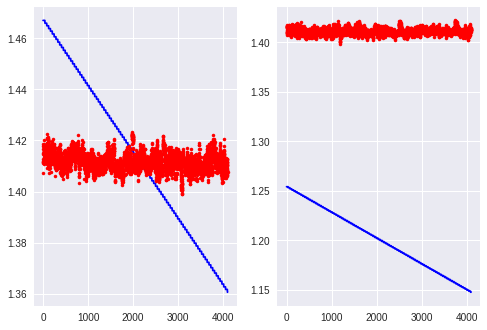

In [6]:
# neighbor = 60
knnclf2 = KNeighborsRegressor(n_neighbors=60, leaf_size=300)
knnclf2.fit(knn_train_X, knn_train_Y)
knn_prediction2 = knnclf2.predict(knn_test_X)
print('60: ' + repr(r2_score(knn_train_Y, knn_prediction2)))

# plot training
fig, ax = plt.subplots(1,2)
ax[0].plot(knn_train_Y, 'b')
ax[0].plot(knnclf2.predict(knn_train_X), 'r.')
ax[1].plot(knn_test_Y, 'b')
ax[1].plot(knn_prediction2, 'r.')

12: -0.038741926427795725


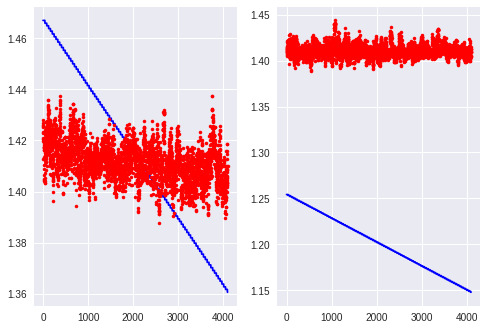

In [7]:
# neighbor = 12
knnclf3 = KNeighborsRegressor(n_neighbors=12, leaf_size=300)
knnclf3.fit(knn_train_X, knn_train_Y)
knn_prediction3 = knnclf3.predict(knn_test_X)
print('12: ' + repr(r2_score(knn_train_Y, knn_prediction3)))

# plot training
fig, ax = plt.subplots(1,2)
ax[0].plot(knn_train_Y, 'b')
ax[0].plot(knnclf3.predict(knn_train_X), 'r.')
ax[1].plot(knn_test_Y, 'b')
ax[1].plot(knn_prediction3, 'r.')

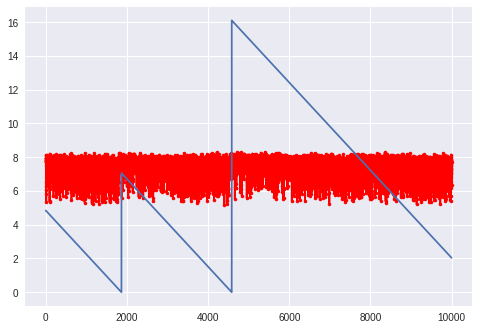

In [0]:
#fig, ax = plt.subplot((0,1)) 

plt.plot(knnclf.predict(knn_test_X), color='r', marker='.')
plt.plot(knn_test_Y)

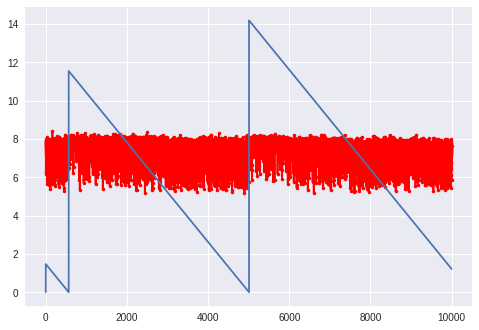

In [0]:
plt.plot(knnclf.predict(knn_train_X), color='r', marker='.')
plt.plot(knn_train_Y)

In [0]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])